## DATA cleaning

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from gensim.models import Word2Vec
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import csv




In [ ]:
df = pd.read_excel('Train_Task_A.xlsx')


In [ ]:
df.head(10)

,Id,Tweet,Hate,Fake
0,5723,@sudhirchaudhary Abhi tak 2000 ke note me mujh...,0,0
1,2338,@Gulamane_raza @MustakimRazvi Abe katiye tumse...,1,1
2,1579,@RajatSharmaLive Ye sab sazish hai....bina sam...,1,1
3,6524,abe jao tum to dasko pahle hi fash gye the jab...,1,0
4,7618,Ab ye afbah kaun faila Raha hai ki Shahhen bag...,0,0
5,5077,@FilmyKhichdii Nahi sudhar sakta tu.... Waise ...,1,0
6,5342,Hindenburg ko America ke 2 Bank ki gadbadi nah...,1,0
7,1451,@AcharyaPramodk Agar tum maan lo ki tabligi ja...,1,1
8,4975,"@TweetAbhishekA Inme se kahiyoun ke pati, pita...",1,0
9,7108,..magar accident mein toh na jane kitne muslim...,0,0


In [115]:
df = df.drop(columns='Id')

In [116]:
df.columns

Index(['Tweet', 'Hate', 'Fake'], dtype='object')

In [117]:
df.Hate.unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Distribution of Hate Class')

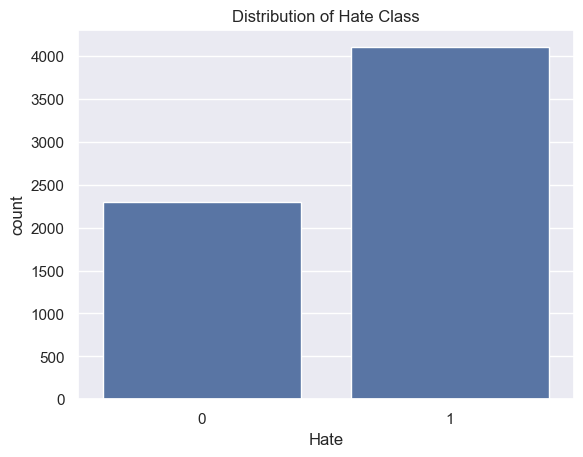

In [118]:
import seaborn as sns
sns.set()
sns.countplot(df, x='Hate').set_title('Distribution of Hate Class')

Text(0.5, 1.0, 'Distribution of Hate Class')

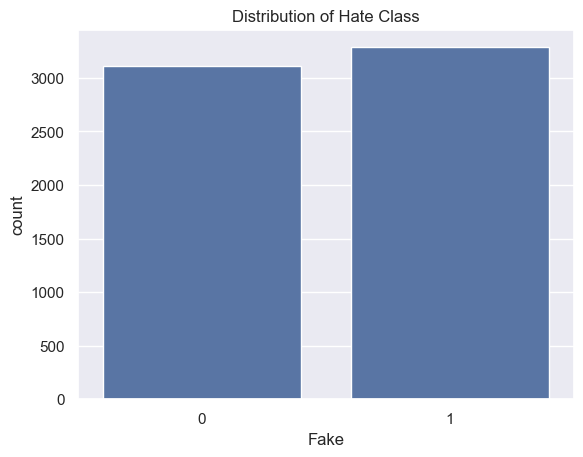

In [119]:
sns.countplot(df, x='Fake').set_title('Distribution of Hate Class')

In [120]:
import re
import string

In [121]:
# function to clean all data
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''

    text = re.sub('(\&amp\;)', '', text)
    # removing any usernames
    text = re.sub('(@[^\s]+)', '', text)
    # removing any hashtags
    text = re.sub('(#[^\s]+)', '', text)
    
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()
    # remove `rt` for retweet
    text = re.sub('(rt)', '', text)
    # string.punctuation is a string of all punctuation marks
    # so this gets rid of all punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # getting rid of `httptco`
    text = re.sub('(httptco)', '', text)

    return text

round1 = lambda x: clean_text_round1(x)

In [122]:
df['Tweet'] = df.Tweet.astype('str')
df.Tweet

0       @sudhirchaudhary Abhi tak 2000 ke note me mujh...
1       @Gulamane_raza @MustakimRazvi Abe katiye tumse...
2       @RajatSharmaLive Ye sab sazish hai....bina sam...
3       abe jao tum to dasko pahle hi fash gye the jab...
4       Ab ye afbah kaun faila Raha hai ki Shahhen bag...
                              ...                        
6391    @team_hyv Pathaan part 2 bhi aa rha hai, boyco...
6392    @amitku1047 @bordiasanjay @izeenatrana @RahulG...
6393    @HusainSahadal Sachaee ladaee hoti h hamare de...
6394                  Hahaha hahaha kejurdin ððð
6395    Aswini upadhyay aap desh ko grhyudh ke raste p...
Name: Tweet, Length: 6396, dtype: object

In [123]:
df['clean_tweets'] = df['Tweet'].apply(round1)

In [124]:
df

,Tweet,Hate,Fake,clean_tweets
0,@sudhirchaudhary Abhi tak 2000 ke note me mujh...,0,0,abhi tak 2000 ke note me mujhe gps nano chip ...
1,@Gulamane_raza @MustakimRazvi Abe katiye tumse...,1,1,abe katiye tumse kuch huaa toh jata nahi bas...
2,@RajatSharmaLive Ye sab sazish hai....bina sam...,1,1,ye sab sazish haibina saman ke koi kaise apne...
3,abe jao tum to dasko pahle hi fash gye the jab...,1,0,abe jao tum to dasko pahle hi fash gye the jab...
4,Ab ye afbah kaun faila Raha hai ki Shahhen bag...,0,0,ab ye afbah kaun faila raha hai ki shahhen bag...
...,...,...,...,...
6391,"@team_hyv Pathaan part 2 bhi aa rha hai, boyco...",1,0,pathaan pa 2 bhi aa rha hai boycott karna nhi...
6392,@amitku1047 @bordiasanjay @izeenatrana @RahulG...,1,0,hindenburg adani pe kuchh bolta hai tto ke...
6393,@HusainSahadal Sachaee ladaee hoti h hamare de...,1,1,sachaee ladaee hoti h hamare desh me tablighi...
6394,Hahaha hahaha kejurdin ððð,0,1,hahaha hahaha kejurdin


In [125]:
df

,Tweet,Hate,Fake,clean_tweets
0,@sudhirchaudhary Abhi tak 2000 ke note me mujh...,0,0,abhi tak 2000 ke note me mujhe gps nano chip ...
1,@Gulamane_raza @MustakimRazvi Abe katiye tumse...,1,1,abe katiye tumse kuch huaa toh jata nahi bas...
2,@RajatSharmaLive Ye sab sazish hai....bina sam...,1,1,ye sab sazish haibina saman ke koi kaise apne...
3,abe jao tum to dasko pahle hi fash gye the jab...,1,0,abe jao tum to dasko pahle hi fash gye the jab...
4,Ab ye afbah kaun faila Raha hai ki Shahhen bag...,0,0,ab ye afbah kaun faila raha hai ki shahhen bag...
...,...,...,...,...
6391,"@team_hyv Pathaan part 2 bhi aa rha hai, boyco...",1,0,pathaan pa 2 bhi aa rha hai boycott karna nhi...
6392,@amitku1047 @bordiasanjay @izeenatrana @RahulG...,1,0,hindenburg adani pe kuchh bolta hai tto ke...
6393,@HusainSahadal Sachaee ladaee hoti h hamare de...,1,1,sachaee ladaee hoti h hamare desh me tablighi...
6394,Hahaha hahaha kejurdin ððð,0,1,hahaha hahaha kejurdin


In [126]:
def tokenise(sentence):
    # Split the sentence into words based on whitespace
    words = sentence.split()
    return words

In [127]:
df["tokens"] = df["clean_tweets"].apply(tokenise)

In [128]:
df["tokens"]

0       [abhi, tak, 2000, ke, note, me, mujhe, gps, na...
1       [abe, katiye, tumse, kuch, huaa, toh, jata, na...
2       [ye, sab, sazish, haibina, saman, ke, koi, kai...
3       [abe, jao, tum, to, dasko, pahle, hi, fash, gy...
4       [ab, ye, afbah, kaun, faila, raha, hai, ki, sh...
                              ...                        
6391    [pathaan, pa, 2, bhi, aa, rha, hai, boycott, k...
6392    [hindenburg, adani, pe, kuchh, bolta, hai, tto...
6393    [sachaee, ladaee, hoti, h, hamare, desh, me, t...
6394                           [hahaha, hahaha, kejurdin]
6395    [aswini, upadhyay, aap, desh, ko, grhyudh, ke,...
Name: tokens, Length: 6396, dtype: object

### Creating Word2Vec models

In [129]:
w2v_model = Word2Vec(df['tokens'], vector_size=150, window=5, min_count=1, workers=4)

In [130]:
word_vector = w2v_model.wv.most_similar("muslim", topn=10)
print(word_vector)

[('agar', 0.9994317293167114), ('nahi', 0.9993627667427063), ('ab', 0.9992887377738953), ('hi', 0.9992388486862183), ('kaha', 0.99908447265625), ('to', 0.9989811778068542), ('tab', 0.9989758133888245), ('chuka', 0.9989284873008728), ('lekin', 0.9989237785339355), ('itna', 0.9989171028137207)]


In [131]:
w2v_model.save("word2vec.model")

In [132]:
def sentence_vector(sentence, model):
    # Tokenize the sentence into words
    words = tokenise(sentence)
    
    # Filter out words that are not in the Word2Vec vocabulary
    words = [word for word in words if word in model.wv.key_to_index]
    
    # If no words in the sentence are in the vocabulary, return a zero vector
    if not words:
        return np.zeros(model.vector_size)
    
    # Compute the mean of the word vectors for each word in the sentence
    vector = np.mean([model.wv[word] for word in words], axis=0)
    return vector

In [133]:
df["word2vec"] = df['clean_tweets'].apply(lambda x: sentence_vector(x,w2v_model))

In [134]:
df['word2vec']

0       [0.05327933, -0.07493128, -0.10879742, -0.2827...
1       [0.11655339, -0.22347006, -0.04057673, -0.0387...
2       [0.1331015, -0.25062883, -0.048129205, -0.0472...
3       [0.10977839, -0.21614453, -0.050451443, -0.031...
4       [0.118409, -0.23630533, -0.04893197, -0.050693...
                              ...                        
6391    [0.08705466, -0.1792776, -0.048283745, -0.0244...
6392    [0.1134323, -0.21345969, -0.058458533, -0.0403...
6393    [0.15209925, -0.29941723, -0.031905744, -0.045...
6394    [0.0040570106, -0.015789637, -0.0033736844, -0...
6395    [0.13197841, -0.24417812, -0.057867028, -0.045...
Name: word2vec, Length: 6396, dtype: object

In [135]:
df.isnull().sum()

Tweet           0
Hate            0
Fake            0
clean_tweets    0
tokens          0
word2vec        0
dtype: int64

In [136]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd


# Define a custom Dataset class
class Word2VecDataset(Dataset):
    def __init__(self, dataframe,target_class):
        self.data = dataframe
        self.target = target_class
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        # Extract the input vector and label for a given index
        vector = torch.tensor(self.data.iloc[index]['word2vec'], dtype=torch.float32)
        label = torch.tensor(self.data.iloc[index][self.target], dtype=torch.long)
        return vector, label

# Create the dataset and dataloader
target = "Hate"
dataset = Word2VecDataset(df,target)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Example usage
for vectors, labels in dataloader:
    print("Batch of vectors:", vectors)
    print("Batch of labels:", labels)
    break


Batch of vectors: tensor([[ 0.0919, -0.1740, -0.0424,  ..., -0.3802,  0.4974, -0.3375],
        [ 0.1176, -0.2280, -0.0495,  ..., -0.4529,  0.6150, -0.4081],
        [ 0.0965, -0.2020, -0.0702,  ..., -0.4305,  0.5786, -0.3836],
        ...,
        [ 0.0942, -0.2010, -0.0481,  ..., -0.4464,  0.5309, -0.3857],
        [ 0.1053, -0.2035, -0.0686,  ..., -0.4529,  0.5941, -0.4152],
        [ 0.1355, -0.2086, -0.0984,  ..., -0.3732,  0.6386, -0.4442]])
Batch of labels: tensor([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 1])


In [137]:
df

,Tweet,Hate,Fake,clean_tweets,tokens,word2vec
0,@sudhirchaudhary Abhi tak 2000 ke note me mujh...,0,0,abhi tak 2000 ke note me mujhe gps nano chip ...,"[abhi, tak, 2000, ke, note, me, mujhe, gps, na...","[0.05327933, -0.07493128, -0.10879742, -0.2827..."
1,@Gulamane_raza @MustakimRazvi Abe katiye tumse...,1,1,abe katiye tumse kuch huaa toh jata nahi bas...,"[abe, katiye, tumse, kuch, huaa, toh, jata, na...","[0.11655339, -0.22347006, -0.04057673, -0.0387..."
2,@RajatSharmaLive Ye sab sazish hai....bina sam...,1,1,ye sab sazish haibina saman ke koi kaise apne...,"[ye, sab, sazish, haibina, saman, ke, koi, kai...","[0.1331015, -0.25062883, -0.048129205, -0.0472..."
3,abe jao tum to dasko pahle hi fash gye the jab...,1,0,abe jao tum to dasko pahle hi fash gye the jab...,"[abe, jao, tum, to, dasko, pahle, hi, fash, gy...","[0.10977839, -0.21614453, -0.050451443, -0.031..."
4,Ab ye afbah kaun faila Raha hai ki Shahhen bag...,0,0,ab ye afbah kaun faila raha hai ki shahhen bag...,"[ab, ye, afbah, kaun, faila, raha, hai, ki, sh...","[0.118409, -0.23630533, -0.04893197, -0.050693..."
...,...,...,...,...,...,...
6391,"@team_hyv Pathaan part 2 bhi aa rha hai, boyco...",1,0,pathaan pa 2 bhi aa rha hai boycott karna nhi...,"[pathaan, pa, 2, bhi, aa, rha, hai, boycott, k...","[0.08705466, -0.1792776, -0.048283745, -0.0244..."
6392,@amitku1047 @bordiasanjay @izeenatrana @RahulG...,1,0,hindenburg adani pe kuchh bolta hai tto ke...,"[hindenburg, adani, pe, kuchh, bolta, hai, tto...","[0.1134323, -0.21345969, -0.058458533, -0.0403..."
6393,@HusainSahadal Sachaee ladaee hoti h hamare de...,1,1,sachaee ladaee hoti h hamare desh me tablighi...,"[sachaee, ladaee, hoti, h, hamare, desh, me, t...","[0.15209925, -0.29941723, -0.031905744, -0.045..."
6394,Hahaha hahaha kejurdin ððð,0,1,hahaha hahaha kejurdin,"[hahaha, hahaha, kejurdin]","[0.0040570106, -0.015789637, -0.0033736844, -0..."


In [138]:

# Set parameters and initialize model, criterion, optimizer
input_size = len(df['word2vec'][0])  # Dimension of word2vec embeddings
hidden_size = 20
output_size = len(df['Hate'].unique())  # Number of unique labels for classification
learning_rate = 0.001


In [139]:
import pennylane as qml

In [140]:
n_qubits = 5
n_layers = 1
dev = qml.device("lightning.qubit", wires=n_qubits)


@qml.qnode(dev)
def quantum_nn(inputs, weights):

  # Input Embedding
  qml.AngleEmbedding(inputs, wires=range(n_qubits))

  qml.BasicEntanglerLayers(weights, wires=range(n_qubits))

  return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]



@qml.qnode(dev)
def quantum_nn2(inputs, weights):

  # Input Embedding
  qml.AngleEmbedding(inputs, wires=range(n_qubits))

  qml.BasicEntanglerLayers(weights, wires=range(n_qubits))

  return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]



In [141]:

n_layers = 1
weight_shapes = {"weights": (n_layers, n_qubits)}

qlayer = qml.qnn.TorchLayer(quantum_nn, weight_shapes)
qlayer2 = qml.qnn.TorchLayer(quantum_nn2, weight_shapes)

In [142]:

class QNN_model(nn.Module):
    def __init__(self,input_size, qlayer,n_qubits):
        super(QNN_model, self).__init__()

        # self.fc1 = nn.Linear(input_size, input_size)
        self.fc2 = nn.Linear(input_size, input_size//10)
        self.fc3 = nn.Linear(input_size//10, input_size//20)
        self.fc4 = nn.Linear(input_size//20, n_qubits)
        
        self.qlayer = qlayer
        self.fc6 = nn.Linear(n_qubits, 2)


    def forward(self, x):
        # x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        # x = torch.relu(self.fc5(x))
        x = torch.relu(self.qlayer(x))
        x = torch.softmax(self.fc6(x), dim=1)

        return x


In [143]:

target = "Hate"
dataset = Word2VecDataset(df,target)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Example usage
for vectors, labels in dataloader:
    print("Batch of vectors:", vectors)
    print("Batch of labels:", labels)
    break

Qmodel1 = QNN_model(150,qlayer,n_qubits)

Batch of vectors: tensor([[ 0.1025, -0.2029, -0.0500,  ..., -0.4063,  0.5540, -0.3513],
        [ 0.1593, -0.3328, -0.0396,  ..., -0.6189,  0.8365, -0.5186],
        [ 0.1065, -0.2168, -0.0488,  ..., -0.4528,  0.5920, -0.3829],
        ...,
        [ 0.0072, -0.0115, -0.0061,  ..., -0.0257,  0.0369, -0.0246],
        [ 0.1049, -0.2136, -0.0369,  ..., -0.4235,  0.5669, -0.3619],
        [ 0.1169, -0.2291, -0.0439,  ..., -0.4548,  0.6102, -0.4063]])
Batch of labels: tensor([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 1])


In [144]:


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Qmodel1.parameters(), lr=0.001)

filename = 'results.csv'
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write header if needed
    writer.writerow(['Epoch','Loss' ,'Model Accuracy' ])



# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    Qmodel1.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        # Forward pass
        outputs = Qmodel1(inputs)
        
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate running loss and accuracy
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        # print(total)
        correct += (predicted == labels).sum().item()

    # Print statistics for the current epoch
    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Accuracy: {epoch_acc}")



    with open(filename, 'a', newline='') as csvfile:
      writer = csv.writer(csvfile)
      writer.writerow([epoch,epoch_loss ,epoch_acc])



Epoch 1/20, Loss: 0.674410988868513, Accuracy: 0.6411819887429644
Epoch 2/20, Loss: 0.6509665672744789, Accuracy: 0.6411819887429644
Epoch 3/20, Loss: 0.6396016162809094, Accuracy: 0.6504065040650406
Epoch 4/20, Loss: 0.6286461233272636, Accuracy: 0.6735459662288931
Epoch 5/20, Loss: 0.6229204510136498, Accuracy: 0.6790181363352095
Epoch 6/20, Loss: 0.6206837741936498, Accuracy: 0.6769856160100063
Epoch 7/20, Loss: 0.6178864292087519, Accuracy: 0.683552220137586
Epoch 8/20, Loss: 0.6164259328329242, Accuracy: 0.6860537836147592
Epoch 9/20, Loss: 0.6148162120726051, Accuracy: 0.6871482176360225
Epoch 10/20, Loss: 0.6140379745040259, Accuracy: 0.6874609130706691
Epoch 11/20, Loss: 0.6127638529061228, Accuracy: 0.6868355222013759
Epoch 12/20, Loss: 0.6135415503798313, Accuracy: 0.6874609130706691
Epoch 13/20, Loss: 0.6126336060962951, Accuracy: 0.6865228267667292
Epoch 14/20, Loss: 0.6121403623402604, Accuracy: 0.6885553470919324
Epoch 15/20, Loss: 0.6111100250255175, Accuracy: 0.68980612

In [145]:

target = "Fake"
dataset = Word2VecDataset(df,target)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Example usage
for vectors, labels in dataloader:
    print("Batch of vectors:", vectors)
    print("Batch of labels:", labels)
    break

Qmodel2 = QNN_model(150,qlayer,n_qubits)

Batch of vectors: tensor([[ 0.0439, -0.0910, -0.0427,  ..., -0.2473,  0.2942, -0.1970],
        [ 0.0952, -0.1911, -0.0501,  ..., -0.4093,  0.5267, -0.3536],
        [ 0.1182, -0.2305, -0.0511,  ..., -0.4616,  0.6184, -0.4029],
        ...,
        [ 0.1187, -0.2354, -0.0417,  ..., -0.4676,  0.6288, -0.4091],
        [ 0.1482, -0.2844, -0.0478,  ..., -0.5602,  0.7436, -0.4924],
        [ 0.1064, -0.2084, -0.0478,  ..., -0.4250,  0.5720, -0.3655]])
Batch of labels: tensor([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 1])


In [146]:


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Qmodel2.parameters(), lr=0.001)

filename = 'results.csv'
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write header if needed
    writer.writerow(['Epoch','Loss' ,'Model Accuracy' ])



# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    Qmodel2.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        # Forward pass
        outputs = Qmodel2(inputs)
        
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate running loss and accuracy
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        # print(total)
        correct += (predicted == labels).sum().item()

    # Print statistics for the current epoch
    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Accuracy: {epoch_acc}")



    with open(filename, 'a', newline='') as csvfile:
      writer = csv.writer(csvfile)
      writer.writerow([epoch,epoch_loss ,epoch_acc])



Epoch 1/20, Loss: 0.6930531373316232, Accuracy: 0.5062539086929331
Epoch 2/20, Loss: 0.6928557928015546, Accuracy: 0.5137585991244528
Epoch 3/20, Loss: 0.6928789158624884, Accuracy: 0.5137585991244528
Epoch 4/20, Loss: 0.6928738687767544, Accuracy: 0.5137585991244528
Epoch 5/20, Loss: 0.6928482619280216, Accuracy: 0.5137585991244528
Epoch 6/20, Loss: 0.6928492134403184, Accuracy: 0.5137585991244528
Epoch 7/20, Loss: 0.6928019884454227, Accuracy: 0.5137585991244528
Epoch 8/20, Loss: 0.6928347032691927, Accuracy: 0.5137585991244528
Epoch 9/20, Loss: 0.6928413593075736, Accuracy: 0.5137585991244528
Epoch 10/20, Loss: 0.6928653232077646, Accuracy: 0.5137585991244528
Epoch 11/20, Loss: 0.6928442741946327, Accuracy: 0.5137585991244528
Epoch 12/20, Loss: 0.6928409269409227, Accuracy: 0.5137585991244528
Epoch 13/20, Loss: 0.6928335632511494, Accuracy: 0.5137585991244528
Epoch 14/20, Loss: 0.6928117552200208, Accuracy: 0.5137585991244528
Epoch 15/20, Loss: 0.6927999101481339, Accuracy: 0.513758

In [147]:
test_data = pd.read_excel("Test_Task_A (1).xlsx")

In [148]:
test_data['temp'] = test_data['Tweet'].apply(lambda x: clean_text_round1(x))
test_data['word2vec'] = test_data['temp'].apply(lambda x: sentence_vector(x,w2v_model)) 
test_data.head(4)

,Id,Tweet,Hate,Fake,temp,word2vec
0,1516,"100 +crore hindu+ others ghar me band h, leki...",1,1,100 crore hindu others ghar me band h lekin y...,"[0.12745269, -0.25061828, -0.042869676, -0.043..."
1,3359,jo bhosadiwale shaheen bagh khali nahi kara pa...,1,0,jo bhosadiwale shaheen bagh khali nahi kara pa...,"[0.12546985, -0.24827546, -0.086246744, -0.060..."
2,6706,ak bar itihas par lena bhavi jaanÃ¢ÂÂ¤Ã¯Â¸Â,0,0,ak bar itihas par lena bhavi jaan,"[0.0693646, -0.13131233, -0.035739332, -0.0327..."
3,6472,Le hindu :- ye kab huaÃ°ÂÂÂ,0,0,le hindu ye kab hua,"[0.16190812, -0.31664705, -0.08530353, -0.0502..."


In [149]:
target_test = "Hate"
dataset_test = Word2VecDataset(test_data,target_test)

In [150]:
Qmodel1.eval()  # Set model to evaluation mode
hate_outputs = []  # List to store binary predictions

for i in range(dataset_test.__len__()):
    input = dataset_test[i][0]  # Get the input data
    input = input.unsqueeze(0)  # Add batch dimension (1, features) if needed
    output = Qmodel1(input)  # Get softmax output
    binary_pred = torch.argmax(output, dim=-1).item()  # Convert to binary (0 or 1)
    hate_outputs.append(binary_pred)

# print("Binary Predictions:", binary_outputs)


In [151]:
target_test = "Fake"
dataset_test = Word2VecDataset(test_data,target_test)

In [152]:
Qmodel2.eval()  # Set model to evaluation mode
fake_outputs = []  # List to store binary predictions

for i in range(dataset_test.__len__()):
    input = dataset_test[i][0]  # Get the input data
    input = input.unsqueeze(0)  # Add batch dimension (1, features) if needed
    output = Qmodel2(input)  # Get softmax output
    binary_pred = torch.argmax(output, dim=-1).item()  # Convert to binary (0 or 1)
    fake_outputs.append(binary_pred)


In [153]:
test_data['Hate_pred'] = hate_outputs
test_data['Fake_pred'] = fake_outputs

In [154]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         800 non-null    int64 
 1   Tweet      800 non-null    object
 2   Hate       800 non-null    int64 
 3   Fake       800 non-null    int64 
 4   temp       800 non-null    object
 5   word2vec   800 non-null    object
 6   Hate_pred  800 non-null    int64 
 7   Fake_pred  800 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 50.1+ KB


In [155]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import os

In [156]:
from sklearn.metrics import classification_report

def predict_and_evaluate(test_data):
    """
    Evaluates the performance of a multi-label classification model on test data.
    
    Args:
    - test_data (pd.DataFrame): DataFrame containing the ground truth labels ('Hate', 'Fake') 
                                and the predicted labels ('Hate_pred', 'Fake_pred').

    Returns:
    - None: Prints classification reports for each target column.
    """
    required_columns = ['Hate', 'Fake', 'Hate_pred', 'Fake_pred']
    missing_columns = [col for col in required_columns if col not in test_data.columns]
    if missing_columns:
        raise KeyError(f"The following required columns are missing in the dataset: {missing_columns}")
    
    # Replace NaN in Target and Severity where Hate == 0
    test_data['Hate'] = test_data['Hate'].fillna(0)
    test_data['Fake'] = test_data['Fake'].fillna(0)
    
    # Extract true labels and predicted labels
    y_test = test_data[['Hate', 'Fake']].astype(int)  # Convert to integers if not already
    y_pred = test_data[['Hate_pred', 'Fake_pred']].astype(int)
    
    # Evaluate each target separately
    for column in y_test.columns:
        print(f"\nClassification Report for {column}:")
        print(classification_report(y_test[column], y_pred[f"{column}_pred"]))


In [157]:
predict_and_evaluate(test_data)


Classification Report for Hate:
              precision    recall  f1-score   support

           0       0.74      0.21      0.32       287
           1       0.68      0.96      0.80       513

    accuracy                           0.69       800
   macro avg       0.71      0.58      0.56       800
weighted avg       0.70      0.69      0.63       800


Classification Report for Fake:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       383
           1       0.52      1.00      0.69       417

    accuracy                           0.52       800
   macro avg       0.26      0.50      0.34       800
weighted avg       0.27      0.52      0.36       800



c:\Users\naman\OneDrive\Documents\Speed-test\lulc\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naman\OneDrive\Documents\Speed-test\lulc\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naman\OneDrive\Documents\Speed-test\lulc\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr